
Pytorch 
* a deep learning framework 
* used extensively for various tasks like Image classification, segmentation, object Identification. 
* we mostly work with data in the form of tensors

Why do we need transform?

In such cases, we’ll have to deal with various types of data. And it’s probable that most of the time, the data may not be in the desired format we need. That’s where transformations come to the rescue.


---



The **torchvision.transforms** module provides various image transformations you can use. 

We use transforms to perform some manipulation of the data and make it suitable for training torchvision module of PyTorch provides transforms for common image transformations. 

**These transformations can be chained together using Compose.**

https://www.analyticsvidhya.com/blog/2021/04/10-pytorch-transformations-you-need-to-know/

## ToTensor


---

* Each filter is (W, H, C) tensor (width, height, channels).

The filters actually are [num_kernels, num_channels, width, height]

https://discuss.pytorch.org/t/whats-the-right-way-to-take-a-4d-tensor-f-w-h-c-and-convert-it-to-f-c-w-h/15215/3

In [ ]:
!pip install kaggle

## Step 1: Import libraries


In [1]:
# Import Libraries
import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torchvision.models as models
import torch.nn as nn
import torch.optim as optim
import numpy as np
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
#from google.colab import files
#files.upload()

In [2]:
torch.__version__

'1.9.0+cu102'

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# chmod to change the persmission
!chmod 60 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d valentynsichkar/cifar10-preprocessed

100% 1.14G/1.14G [00:24<00:00, 53.4MB/s]
100% 1.14G/1.14G [00:24<00:00, 50.3MB/s]


In [ ]:
from zipfile import ZipFile
file_name = "cifar10-preprocessed.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


## Step 2: Define transforms

* **transforms.Compose** lets us compose multiple transforms together so we can use more than one transformation.

* **transforms.Resize((255))** resizes the images so the shortest side has a length of 255 pixels. The other side is scaled to maintain the aspect ratio of the image.

* **transforms.CenterCrop(224)** crops the center of the image so it is a 224 by 224 pixels square image.

* **transforms.ToTensor()** converts our image into numbers. It separates the 3 colors that every pixel of our picture is comprised of: red, green & blue. This essentially turns one image into three images (one tinted red, one green, one blue).

  Then, it converts the pixels of each tinted image into the brightness of their color, from 0 to 255. These values are divided by 255, so they can be in a range of 0 to 1. Our image is now a Torch Tensor (a data structure that stores lots of numbers)

* **transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])** subtracts the mean from each value and then divides by the standard deviation.

We will be using a pre-trained model, so we need to use the means and standard deviations the Pytorch specifies. There are three values in the mean and standard deviation to match each RGB picture.

In [3]:
# Specify transforms using torchvision.transforms as transforms
# library
transformations = transforms.Compose([
    transforms.Resize(255),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

## Step 3: Import our data and put it into a DataLoader

We use the torchvision.datasets library.

We specify two different data sets, one for the images that the AI learns from (the training set) and the other for the dataset we use to test the AI model (the validation set).

The **datasets.ImageFolder()** command expects our data to be organized in the following way: root/label/picture.png. In other words, the images should be sorted into folders. 
We give the command
1. the path to all the folders and
2. the transforms that we specified in the previous step.

In [ ]:
# Load in each dataset and apply transformations using
# the torchvision.datasets as datasets library
train_set = datasets.ImageFolder("/content/dog.jpg", transform = transformations)
val_set = datasets.ImageFolder("/content/dog.jpg", transform = transformations)

Then we want to put our imported images into a Dataloader.


Dataloader is able to spit out random samples of our data, so our model won’t have to deal with the entire dataset every time. This makes training more efficient.

We specify how many images we want at once as our batch_size (so 32 means we want to get 32 images at one time). We also want to shuffle our images so it gets inputted randomly into our AI model.



---



Reference for all transforms 

https://pytorch-geometric.readthedocs.io/en/latest/modules/transforms.html

### Scriptable transforms

In order to script the transformations, please use torch.nn.Sequential instead of Compose.

transforms = torch.nn.Sequential(
    transforms.CenterCrop(10),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
)
scripted_transforms = torch.jit.script(transforms)

https://pytorch.org/vision/stable/transforms.html



---



# 1. ToTensor


<bound method Image.show of <PIL.Image.Image image mode=RGB size=250x250 at 0x7FEC6FB99F10>>
torch.Size([3, 250, 250])
tensor([[[0.4118, 0.4471, 0.4941,  ..., 0.5412, 0.5569, 0.5373],
         [0.3804, 0.3922, 0.4314,  ..., 0.5176, 0.5294, 0.5176],
         [0.4118, 0.3725, 0.3686,  ..., 0.4667, 0.4745, 0.4627],
         ...,
         [0.6863, 0.6000, 0.3961,  ..., 0.2667, 0.2824, 0.2863],
         [0.6824, 0.5529, 0.3529,  ..., 0.2549, 0.2745, 0.2863],
         [0.4784, 0.4078, 0.3529,  ..., 0.2471, 0.2706, 0.2902]],

        [[0.2314, 0.2549, 0.3137,  ..., 0.6431, 0.6588, 0.6667],
         [0.2157, 0.2078, 0.2431,  ..., 0.6392, 0.6510, 0.6431],
         [0.2510, 0.2000, 0.1804,  ..., 0.6078, 0.6118, 0.6039],
         ...,
         [0.5294, 0.4667, 0.2431,  ..., 0.3725, 0.4000, 0.4157],
         [0.5412, 0.4275, 0.2118,  ..., 0.3490, 0.3804, 0.4078],
         [0.3490, 0.2980, 0.2353,  ..., 0.3294, 0.3569, 0.3922]],

        [[0.2706, 0.2745, 0.3176,  ..., 0.2941, 0.3255, 0.3255],
    

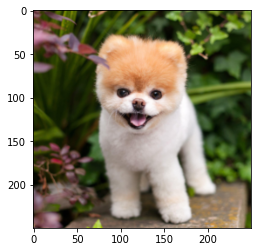

In [82]:
from PIL import Image
import torchvision.transforms.functional as TF

image2 = Image.open('/content/dog.jpg')
#plt.imshow(transforms.ToPILImage()(transforms.ToTensor()(image)), interpolation="bicubic")
transform = transforms.Compose([transforms.Resize((250,250))])
image = transform(image2)
x = TF.to_tensor(image)

#displayed original image
plt.imshow(image)

#x.unsqueeze_(0)
print(image.show)
print(x.shape)
print(x)
#output = model(X)

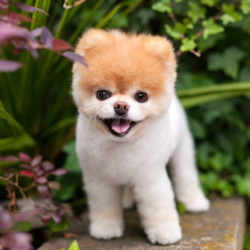

In [83]:
image

# 2. Normalize

This operation will take a tensor image and normalize it with mean and standard deviation. 

It has 3 parameters: mean, std, inplace. 

We need to provide a sequence of means for the 3 channels as parameter ‘mean’ and similarly for ‘std’. 

If you make ‘inplace’ as True, the changes will be reflected in the current tensor.


changed


tensor([[[-0.1765, -0.1059, -0.0118,  ...,  0.0824,  0.1137,  0.0745],
         [-0.2392, -0.2157, -0.1373,  ...,  0.0353,  0.0588,  0.0353],
         [-0.1765, -0.2549, -0.2627,  ..., -0.0667, -0.0510, -0.0745],
         ...,
         [ 0.3725,  0.2000, -0.2078,  ..., -0.4667, -0.4353, -0.4275],
         [ 0.3647,  0.1059, -0.2941,  ..., -0.4902, -0.4510, -0.4275],
         [-0.0431, -0.1843, -0.2941,  ..., -0.5059, -0.4588, -0.4196]],

        [[-0.5373, -0.4902, -0.3725,  ...,  0.2863,  0.3176,  0.3333],
         [-0.5686, -0.5843, -0.5137,  ...,  0.2784,  0.3020,  0.2863],
         [-0.4980, -0.6000, -0.6392,  ...,  0.2157,  0.2235,  0.2078],
         ...,
         [ 0.0588, -0.0667, -0.5137,  ..., -0.2549, -0.2000, -0.1686],
         [ 0.0824, -0.1451, -0.5765,  ..., -0.3020, -0.2392, -0.1843],
         [-0.3020, -0.4039, -0.5294,  ..., -0.3412, -0.2863, -0.2157]],

        [[-0.4588, -0.4510, -0.3647,  ..., -0.4118, -0.3490, -0.3490],
         [-0.4980, -0.5137, -0.4745,  ..., -0

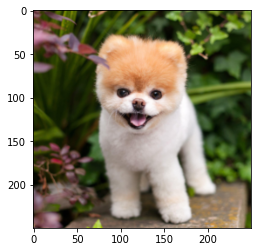

In [84]:
#torchvision.transforms.Normalize([meanOfChannel1, meanOfChannel2, meanOfChannel3], [stdOfChannel1, stdOfChannel2, stdOfChannel3])
plt.imshow(image)
a=transforms.Compose([transforms.ToTensor()])
b=a(image)
b

print("changed")
c= transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
d=c(image)
d


# 3. CenterCrop

This will crop the given tensor image at the center. You can provide the size you want to crop as input in the form of (height, width) to transforms.CenterCrop(). 

torch.Size([3, 200, 100])
tensor([[[0.0863, 0.0980, 0.1216,  ..., 0.1373, 0.1647, 0.2431],
         [0.0706, 0.0784, 0.1176,  ..., 0.1686, 0.2000, 0.2588],
         [0.0510, 0.0745, 0.1216,  ..., 0.2235, 0.2314, 0.2902],
         ...,
         [0.2667, 0.2745, 0.2941,  ..., 0.9647, 0.9647, 0.9647],
         [0.2745, 0.2784, 0.2941,  ..., 0.9608, 0.9647, 0.9686],
         [0.2863, 0.2863, 0.2980,  ..., 0.9608, 0.9686, 0.9686]],

        [[0.1412, 0.1647, 0.1922,  ..., 0.2039, 0.2353, 0.3137],
         [0.1176, 0.1412, 0.1882,  ..., 0.2431, 0.2863, 0.3569],
         [0.1020, 0.1294, 0.1961,  ..., 0.3020, 0.3255, 0.3922],
         ...,
         [0.2039, 0.2196, 0.2392,  ..., 0.9451, 0.9451, 0.9490],
         [0.2118, 0.2196, 0.2431,  ..., 0.9451, 0.9490, 0.9529],
         [0.2235, 0.2314, 0.2431,  ..., 0.9451, 0.9529, 0.9569]],

        [[0.0314, 0.0392, 0.0510,  ..., 0.0706, 0.0745, 0.0863],
         [0.0196, 0.0275, 0.0353,  ..., 0.0627, 0.0627, 0.0549],
         [0.0118, 0.0157, 0.0275

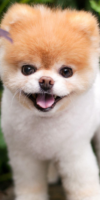

In [85]:
transform = transforms.Compose([transforms.ToTensor(),transforms.CenterCrop((200,100))])
tensor_img = transform(image)
print(tensor_img.shape)
print(tensor_img)

transform1 = transforms.Compose([transforms.CenterCrop((200,100))])
tensor_img2 = transform1(image)
#print(tensor_img2.shape)
tensor_img2



### What happens if you provide only one size dimension instead of two?

* **It’ll assume it as a square and a crop of (size, size) will be made.**

### What if the dimensions given for the crop turn out to be larger than the original dimensions?

* **Along such edges, the image will be padded with 0!**

# IF 2ND DIMENSION NOT GIVEN, THEN ASSUMES SQUARE

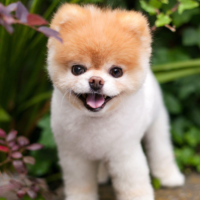

In [86]:
transform2 = transforms.Compose([transforms.CenterCrop((200))])
tensor_img3 = transform2(image)
#print(tensor_img2.shape)
tensor_img3

# IF CROP SIZE>IMAGE => IMAGES WILL BE PADDED WITH 0

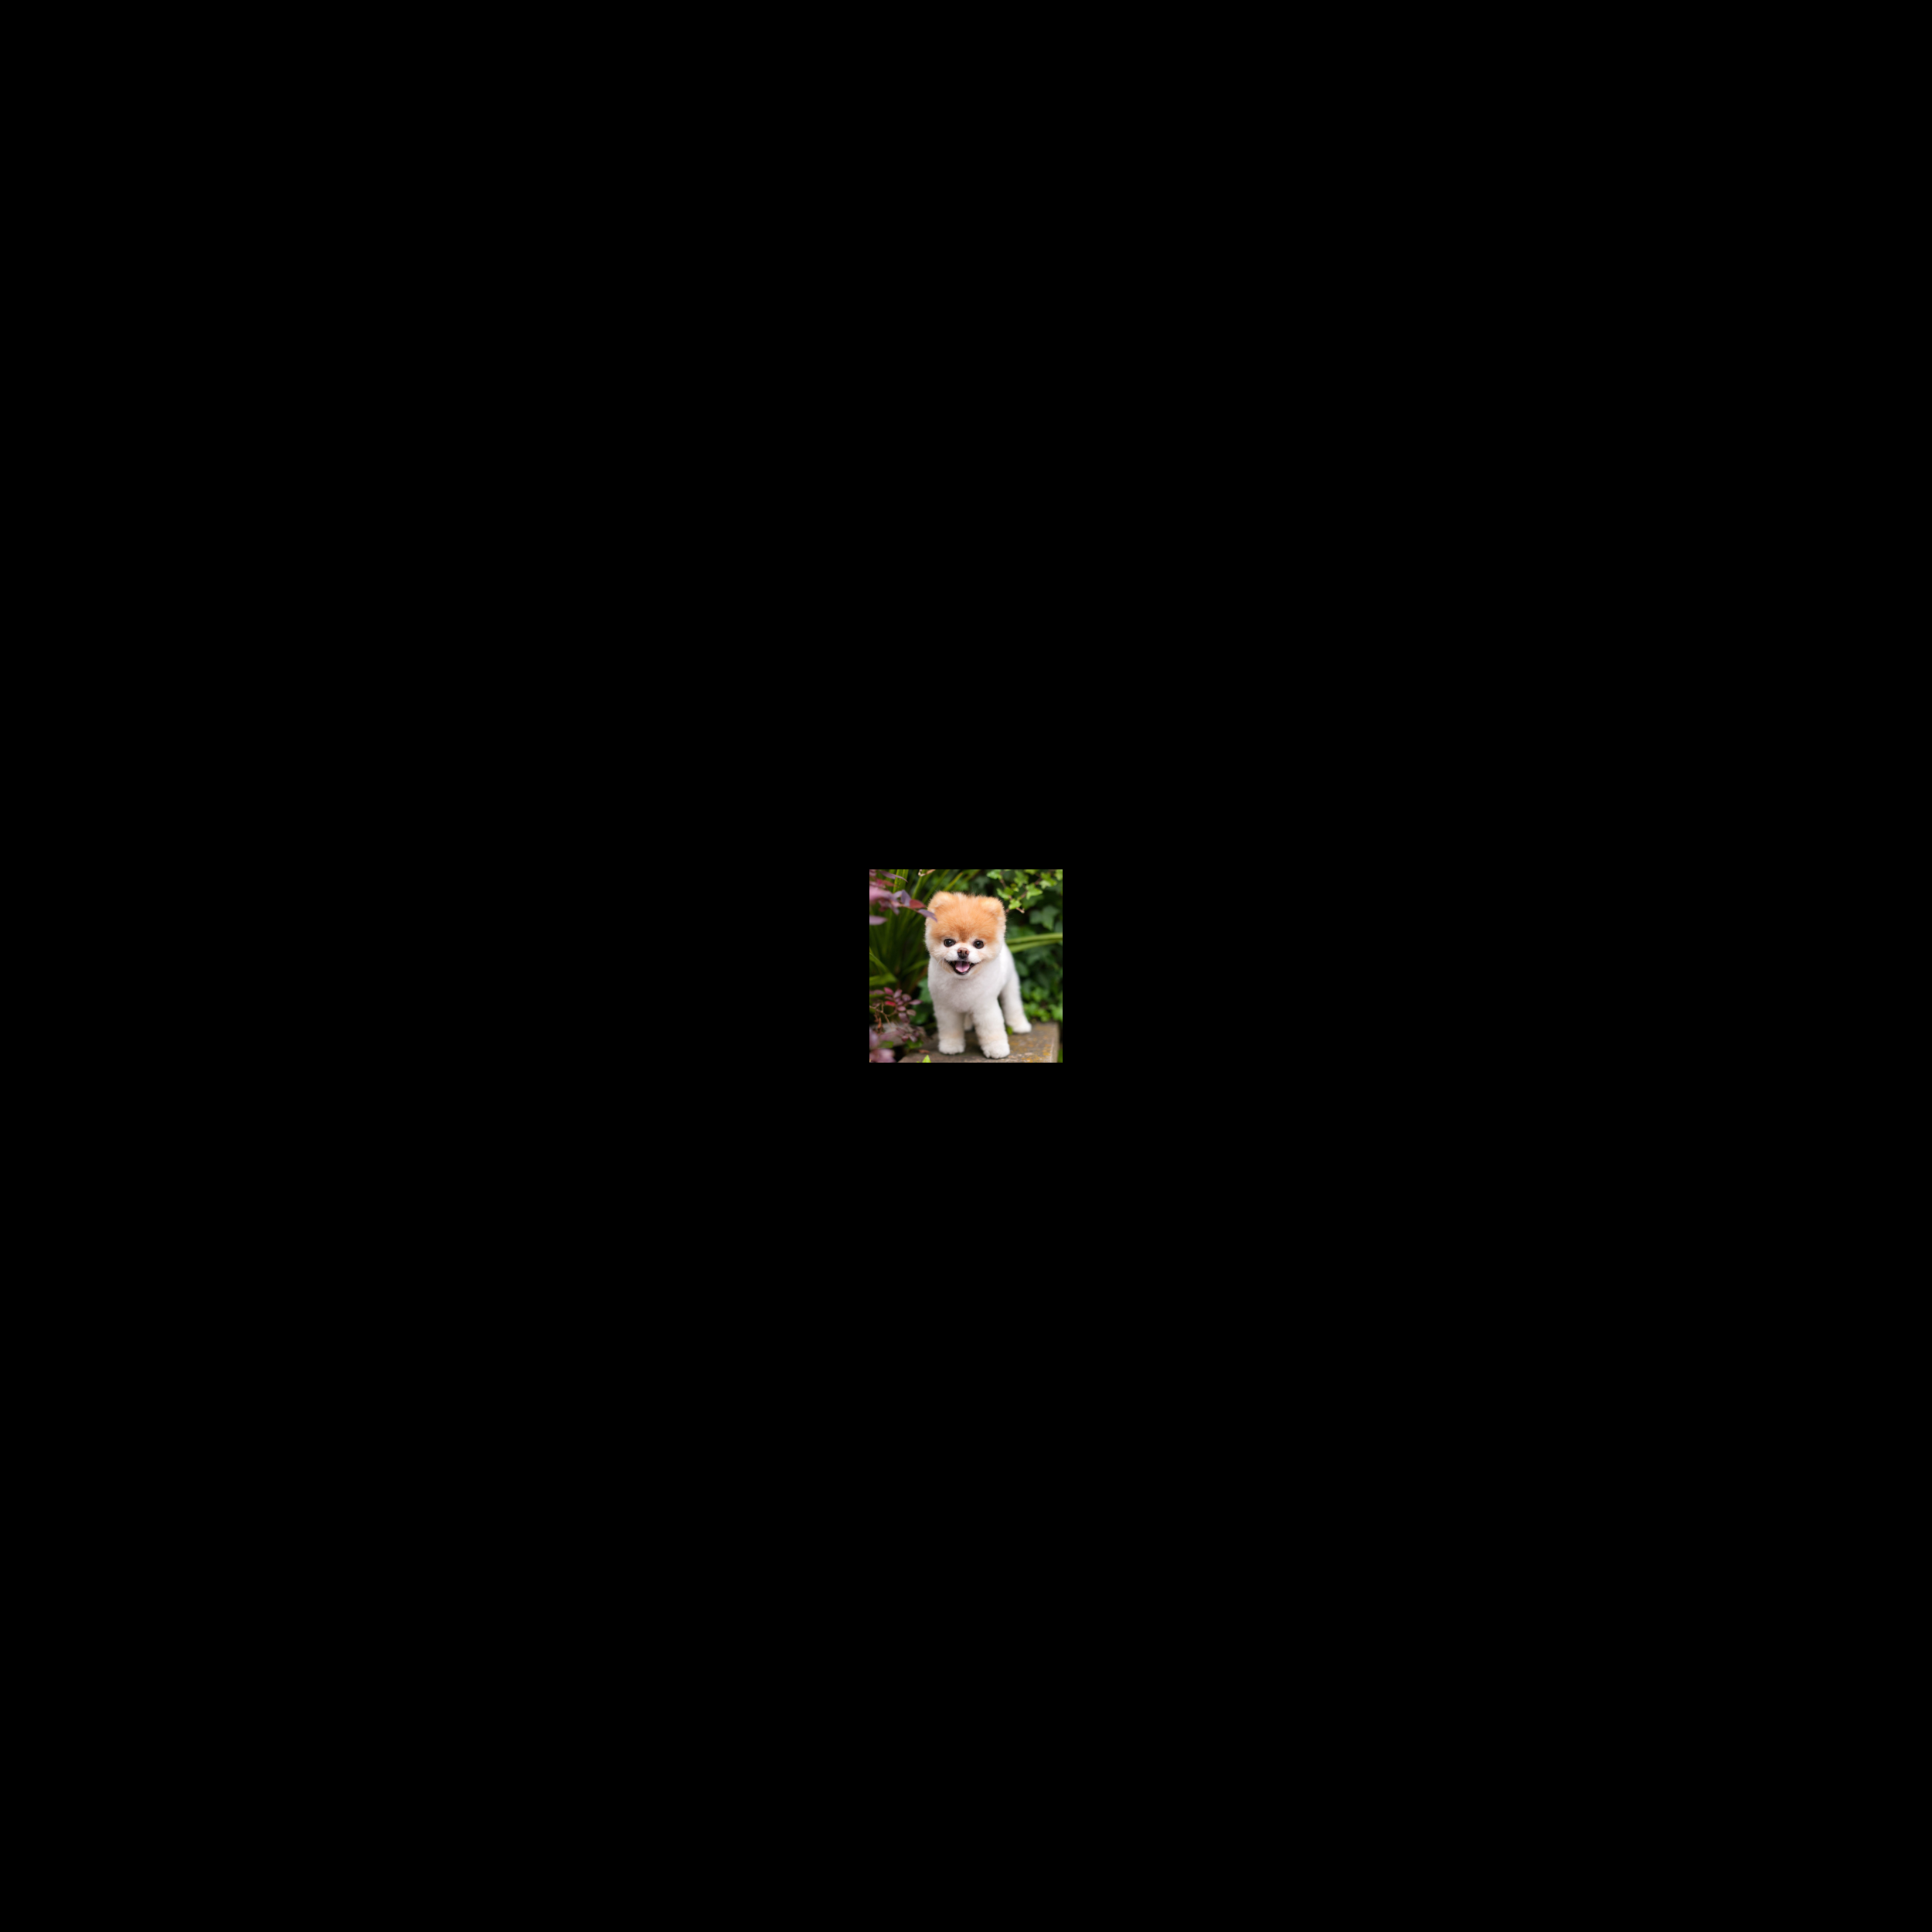

In [87]:
transform3 = transforms.Compose([transforms.CenterCrop((2500,2500))])
tensor_img4 = transform3(image)

tensor_img4

# 4. RandomHorizontalFlip

This transformation will flip the image horizontally (random) with a given probability. 

You can set this probability through the parameter ‘p’. The default value of p is 0.5.


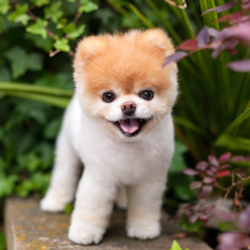

In [88]:
transform = transforms.Compose([transforms.RandomHorizontalFlip(p=0.9)])
tensor_img = transform(image)
tensor_img




# 5. RandomRotation

This transformation rotates the image randomly by an angle. The angle in degrees can be provided as input to that parameter “degrees”.

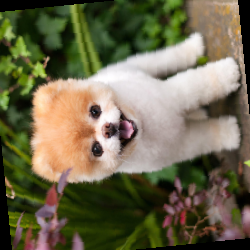

In [89]:
transform = transforms.Compose([transforms.RandomRotation(degrees=180)])
tensor_img = transform(image)
tensor_img

# 6. Grayscale

This transformation will change the original RGB image into grayscale (i.e Black and white). You can provide how many channels you want as input to the parameter “num_output_channels”.

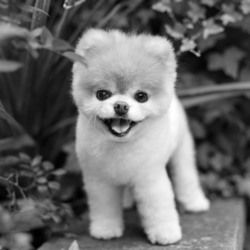

In [90]:
transform = transforms.Compose([transforms.Grayscale(num_output_channels=1)])
tensor_img = transform(image)
tensor_img

# 7. GaussianBlur

Here, the image will be blurred with a randomly chosen Gaussian blur. It is compulsory to provide the kernel_size argument.


In [ ]:
transform = transforms.Compose([transforms.GaussianBlur(kernel_size=501)])
tensor_img = transform(image)
tensor_img


# 8. RandomApply

This transformation will randomly apply a given list of transformations with probability.



/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:917: UserWarning: The use of the transforms.RandomSizedCrop transform is deprecated, please use transforms.RandomResizedCrop instead.
  warnings.warn("The use of the transforms.RandomSizedCrop transform is deprecated, " +


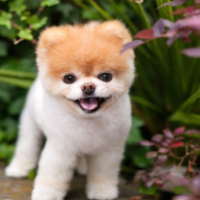

In [91]:
transform = transforms.RandomApply([transforms.RandomSizedCrop(200),transforms.RandomHorizontalFlip()],p=0.6)
tensor_img = transform(image)
tensor_img

# 9. Compose

 it composes several transforms together.

Some of the transforms are to manipulate the data in the required format. 

Whereas, transforms like Grayscale, RandomHorizontalFlip, and RandomRotation are required for Image data Augmentation.

In [92]:
transform=transforms.Compose([transforms.Grayscale(1),transforms.CenterCrop(10), transforms.ToTensor()])
tensor_img = transform(image)
tensor_img

tensor([[[0.0941, 0.0549, 0.0706, 0.0824, 0.0941, 0.1255, 0.1804, 0.2863,
          0.1804, 0.2588],
         [0.0824, 0.0667, 0.0902, 0.0863, 0.0941, 0.1216, 0.1647, 0.2510,
          0.1882, 0.2471],
         [0.0784, 0.0824, 0.1059, 0.1137, 0.1255, 0.1647, 0.2157, 0.2745,
          0.2941, 0.2941],
         [0.1020, 0.1098, 0.1333, 0.1490, 0.1686, 0.2078, 0.2471, 0.3020,
          0.3765, 0.2314],
         [0.1451, 0.1569, 0.1804, 0.2000, 0.2235, 0.2667, 0.2980, 0.3490,
          0.4235, 0.3059],
         [0.2039, 0.2275, 0.2588, 0.2980, 0.3412, 0.3882, 0.4235, 0.4706,
          0.5176, 0.3451],
         [0.3020, 0.3255, 0.3647, 0.4157, 0.4667, 0.5216, 0.5647, 0.6196,
          0.6431, 0.3608],
         [0.4118, 0.4392, 0.4745, 0.5373, 0.5961, 0.6431, 0.6902, 0.7216,
          0.5961, 0.2118],
         [0.5059, 0.5373, 0.5765, 0.6549, 0.7059, 0.7529, 0.7843, 0.6980,
          0.3412, 0.1569],
         [0.5529, 0.5882, 0.6510, 0.7490, 0.8157, 0.8275, 0.7216, 0.3373,
          0.2157,

# 10. Resize



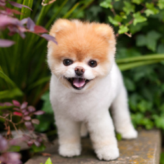

In [93]:
transform = transforms.Compose([transforms.Resize((164,164))])
tensor_img = transform(image)
tensor_img

# 11. Add Gaussian Noise

In [94]:
class AddGaussianNoise(object):
    def __init__(self, mean=0., std=1.):
        self.std = std
        self.mean = mean
        
    def __call__(self, tensor):
        return tensor + torch.randn(tensor.size()) * self.std + self.mean
    
    def __repr__(self):
        return self.__class__.__name__ + '(mean={0}, std={1})'.format(self.mean, self.std)

In [95]:
transform = transforms.Compose([transforms.ToTensor(),AddGaussianNoise(0.1, 0.08)])
tensor_img = transform(image)
tensor_img

#tuple object is not callable , so we use ToTensor

tensor([[[0.5184, 0.5212, 0.6769,  ..., 0.5250, 0.8014, 0.7598],
         [0.6747, 0.5022, 0.4777,  ..., 0.6170, 0.7333, 0.5079],
         [0.4269, 0.2599, 0.5585,  ..., 0.5921, 0.5769, 0.4946],
         ...,
         [0.9302, 0.7346, 0.3635,  ..., 0.3626, 0.3941, 0.2264],
         [0.8081, 0.6449, 0.4489,  ..., 0.5727, 0.2786, 0.3264],
         [0.5273, 0.4444, 0.4576,  ..., 0.2412, 0.3035, 0.5232]],

        [[0.2657, 0.2385, 0.5005,  ..., 0.6025, 0.6946, 0.7834],
         [0.4138, 0.3223, 0.2834,  ..., 0.7967, 0.6633, 0.9611],
         [0.3846, 0.2795, 0.2845,  ..., 0.6420, 0.6050, 0.6446],
         ...,
         [0.5407, 0.5275, 0.3017,  ..., 0.3060, 0.5112, 0.5072],
         [0.7568, 0.5533, 0.2502,  ..., 0.4825, 0.4991, 0.5986],
         [0.3264, 0.4185, 0.4764,  ..., 0.3567, 0.3823, 0.5504]],

        [[0.3351, 0.2983, 0.2387,  ..., 0.2710, 0.4342, 0.4311],
         [0.4383, 0.3162, 0.3300,  ..., 0.2944, 0.3514, 0.2827],
         [0.4804, 0.3323, 0.2839,  ..., 0.3583, 0.2553, 0.

# 12. Random Erasing

https://www.researchgate.net/publication/319151271_Random_Erasing_Data_Augmentation


Object detection aims at detecting instances of semantic objects of a certain class in images. Since we can
achieve the location of each object in the image from
training data, we implement Random Erasing with three
schemes:

1) Image-aware Random Erasing (IRE): selecting erasing region on the whole image as same as image
classification and person re-identification; 

2) Object-aware
Random Erasing (ORE): selecting erasing region in the
bounding box of each object. In this scheme, if there are
multiple objects in the image, Random Erasing is applied on
each object separately. 

3) Image and Object-aware Random Erasing (I+ORE): selecting erasing region in both
the whole image and each object bounding box. 

Examples of Random Erasing for object detection with these three
schemes are shown in Fig. 2.

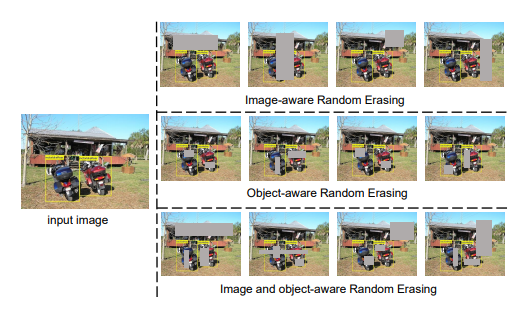

Occlusion is a critical influencing factor on the generalization ability of CNNs. It is desirable that invariance to various levels of occlusion is achieved. When some parts
of an object are occluded, a strong classification model
should recognize its category from the overall object structure. However, the collected training samples usually exhibit limited variance in occlusion. 

In an extreme case when all the training objects are clearly visible, i.e., no occlusion happens, the learned CNN model will work well on the testing images without occlusion. But it may fail to recognize objects which are partially occluded, due to the limited generalization ability of the CNN model. While we can manually add occluded natural images to the training data, this process is costly and the levels of occlusion can be limited.

To address the occlusion problem and improve the generalization ability of CNNs, this paper introduces a new data
augmentation approach, Random Erasing. It can be easily
implemented in most existing CNN models. 

In the training phase, an image within a mini-bath will randomly undergo either of the two operations: 

1) keep unchanged; 

2) randomly choose a rectangle region of an arbitrary size, and
assign the pixels within the selected region with random values. 

During Operation 2), an image is partially occluded
in a random position and with a random-sized mask. In
this manner, images with various occlusion levels based on
the original image can be generated. Examples of Random
Erasing are shown in Fig. 1.

In [ ]:
transform = transforms.Compose([transforms.RandomErasing()])
tensor_img = transform(image)
tensor_img

# why did it didn't get erased?
#why error?

# 13. Duplicate



# 14. Functional Transforms


the parameters are generated randomly. This usually is sufficient for data augmentation. But, sometimes you may require a more fine-grained control of the transformation pipeline. In this case, functional transforms can be used. Here, you get to specify or generate all the parameters. An added advantage is that a particular defined functional transform can be applied to multiple images.

All the functional transforms can be accessed from torchvision.transforms.functional.


## A) adjust_brightness:

This focuses on adjusting the brightness of an image. 

It takes the image as input in the form of a PyTorch tensor. 

It also has an important parameter “brightness_factor”. 

This will denote how to actually change the brightness. 

For example, if the value is 1, you’ll get the same image you gave as input. 

If the value is more than 1, you’ll get a brighter image. 

If it’s less than 1, you’ll get a darker image. 

You can pass a float value accordingly. 

The image returned will be in a tensor or PIL image.

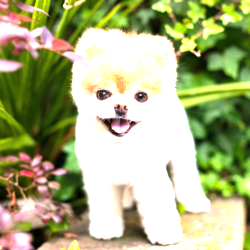

In [96]:
new_img = transforms.functional.adjust_brightness(image,brightness_factor=2)
new_img

# B) adjust_contrast:

here we have another transform for adjusting the contrast of the image. 

It takes two input parameters: the image in the tensor form and “contrast_factor”. 

The second parameter will input a float value that will tell how the contrast has to be adjusted. 

But it cannot be negative.

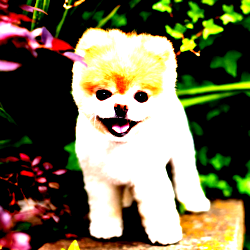

In [97]:
new_img = transforms.functional.adjust_contrast(image,contrast_factor=3.8)
new_img

# C) adjust_hue

Hue is an important property of an image. 

Pytorch allows you to adjust it through the transforms.functional.adjust_hue .

First,  the image will get converted into HSV (Hue, saturation, value) form. 

The changes will be made in the H channel as per our parameters. 

After changes, the image will be converted to its original form. 

The important parameter for this is “hue_factor” . 

It can be a  float value in the range of [-0.5.0.5].

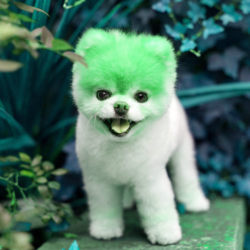

In [98]:
new_img = transforms.functional.adjust_hue(image,hue_factor=0.3)
new_img

# D)adjust_saturation

This is to adjust the color saturation of the input image. Similar to the above cases, we have a “saturation_factor” parameter that decides how saturation is to be varied. This inputs a float value. If you set it as 0, you’ll get a black and white image.

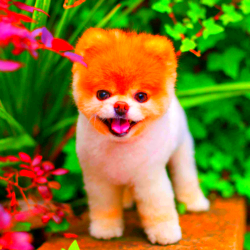

In [99]:
new_img = transforms.functional.adjust_saturation(image,saturation_factor=6)
new_img

#E) adjust_sharpness:

You can adjust the sharpness of the image through this transform. It takes a float value as input for the “sharpness_factor” parameter. This value can be anything except negative. In the below code, I have used a sharpness factor of 10, which means the transformed image will be 10 times sharp as the original.



###PARAMETERS

* **img (PIL Image or Tensor)** – Image to be adjusted. If img is torch Tensor, it is expected to be in […, 1 or 3, H, W] format, where … means it can have an arbitrary number of leading dimensions.

sharpness_factor (float) – How much to adjust the sharpness. Can be any non negative number. 0 gives a blurred image, 1 gives the original image while 2 increases the sharpness by a factor of 2.

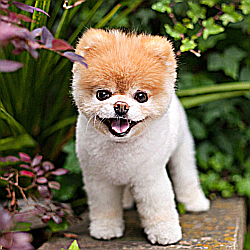

In [100]:
new_img = transforms.functional.adjust_sharpness(image,sharpness_factor=10)
new_img

# F) equalize:

This transform will equalize the histogram of an image.

It will apply a non-linear mapping to the input, which shall create a uniform distribution of grayscale values in the output.


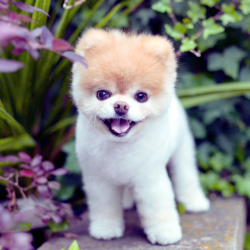

In [101]:
new_img = transforms.functional.equalize(image)
new_img

# 15. gamma correction

Perform gamma correction on an image.

Also known as Power Law Transform. Intensities in RGB mode are adjusted based on the following equation

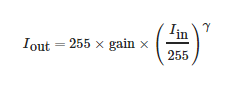

Gamma correction or gamma is a nonlinear operation used to encode and decode luminance or tristimulus values in video or still image systems. Gamma correction is, in the simplest cases, defined by the following power-law expression:

image.png

Gamma encoding of images is used to optimize the usage of bits when encoding an image, or bandwidth used to transport an image, by taking advantage of the non-linear manner in which humans perceive light and color.



https://en.wikipedia.org/wiki/Gamma_correction

Relative luminance - https://en.wikipedia.org/wiki/Relative_luminance

Tristimulus values - 
https://en.wikipedia.org/wiki/CIE_1931_color_space#Tristimulus_values

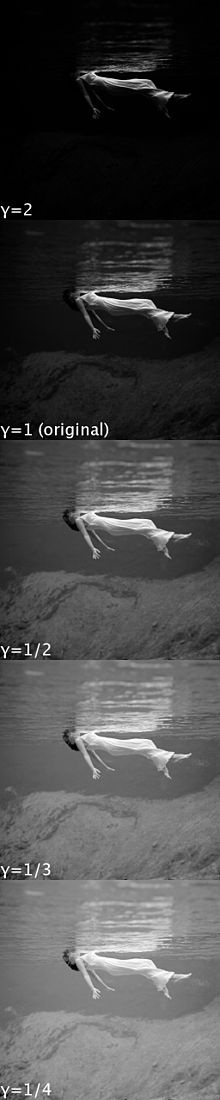

Parameters
* img (PIL Image or Tensor) – PIL Image to be adjusted. If img is torch Tensor, it is expected to be in […, 1 or 3, H, W] format, where … means it can have an arbitrary number of leading dimensions. If img is PIL Image, modes with transparency (alpha channel) are not supported.

* gamma (float) – Non negative real number, same as γ in the equation. gamma larger than 1 make the shadows darker, while gamma smaller than 1 make dark regions lighter.

* gain (float) – The constant multiplier.



---



---



# 16. Padding

* padding (int or sequence) –
Padding on each border. If a single int is provided this is used to pad all borders. If sequence of length 2 is provided this is the padding on left/right and top/bottom respectively. If a sequence of length 4 is provided this is the padding for the left, top, right and bottom borders respectively.

* fill (number or str or tuple) – Pixel fill value for constant fill. Default is 0. If a tuple of length 3, it is used to fill R, G, B channels respectively. This value is only used when the padding_mode is constant. Only number is supported for torch Tensor. Only int or str or tuple value is supported for PIL Image.

* padding_mode (str) –
Type of padding. Should be: constant, edge, reflect or symmetric. Default is constant.

    * constant: pads with a constant value, this value is specified with fill

  * edge: pads with the last value at the edge of the image. If input a 5D torch Tensor, the last 3 dimensions will be padded instead of the last 2

  * reflect: pads with reflection of image without repeating the last value on the edge. For example, padding [1, 2, 3, 4] with 2 elements on both sides in reflect mode will result in [3, 2, 1, 2, 3, 4, 3, 2]

  * symmetric: pads with reflection of image repeating the last value on the edge. For example, padding [1, 2, 3, 4] with 2 elements on both sides in symmetric mode will result in [2, 1, 1, 2, 3, 4, 4, 3]

In [45]:
transform=transforms.Compose([transforms.ToTensor(),transforms.Pad(padding, fill=0, padding_mode='constant')])
tensor_img = transform(image)
tensor_img

NameError: ignored

# **RANDOM AFFINE**

## Parameters


---

* **degrees (sequence or number)** – Range of degrees to select from. If degrees is a number instead of sequence like (min, max), the range of degrees will be (-degrees, +degrees). Set to 0 to deactivate rotations.

* **translate (tuple, optional)** – tuple of maximum absolute fraction for horizontal and vertical translations. For example translate=(a, b), then horizontal shift is randomly sampled in the range -img_width * a < dx < img_width * a and vertical shift is randomly sampled in the range -img_height * b < dy < img_height * b. Will not translate by default.

* **scale (tuple, optional)** – scaling factor interval, e.g (a, b), then scale is randomly sampled from the range a <= scale <= b. Will keep original scale by default.

* shear (sequence or number, optional) – Range of degrees to select from. If shear is a number, a shear parallel to the x axis in the range (-shear, +shear) will be applied. Else if shear is a sequence of 2 values a shear parallel to the x axis in the range (shear[0], shear[1]) will be applied. Else if shear is a sequence of 4 values, a x-axis shear in (shear[0], shear[1]) and y-axis shear in (shear[2], shear[3]) will be applied. Will not apply shear by default.

* interpolation (InterpolationMode) – Desired interpolation enum defined by torchvision.transforms.InterpolationMode. Default is InterpolationMode.NEAREST. If input is Tensor, only InterpolationMode.NEAREST, InterpolationMode.BILINEAR are supported. For backward compatibility integer values (e.g. PIL.Image.NEAREST) are still acceptable.

* fill (sequence or number) – Pixel fill value for the area outside the transformed image. Default is 0. If given a number, the value is used for all bands respectively.

* fillcolor (sequence or number, optional) – deprecated argument and will be removed since v0.10.0. Please use the fill parameter instead.

* resample (int, optional) – deprecated argument and will be removed since v0.10.0. Please use the interpolation parameter instead.


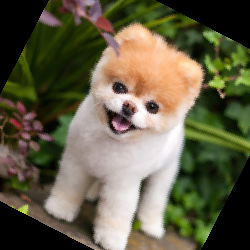

In [102]:
#transforms.RandomAffine(degrees, translate=None, scale=None, shear=None, interpolation=<InterpolationMode.NEAREST: 'nearest'>, fill=0, fillcolor=None, resample=None)
a=transforms.RandomAffine(50, translate=None)
b=a(image)
b

## RANDOM AFFINE - TRANSLATE

 tuple of maximum absolute fraction for horizontal and vertical translations. 
 
 For example 
 * translate=(a, b), then horizontal shift is randomly sampled in the range -img_width * a < dx < img_width * a 
 
*  and vertical shift is randomly sampled in the range -img_height * b < dy < img_height * b. Will not translate by default.

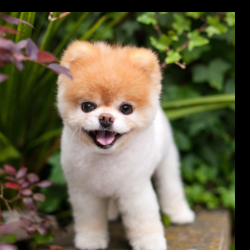

In [103]:
a=transforms.RandomAffine(0,translate=(0.2,0.5))
b=a(image)
b

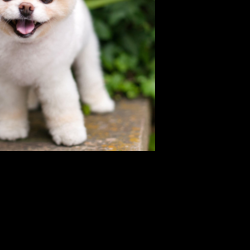

In [104]:
a=transforms.RandomAffine(0,translate=(0.9,0.5))
b=a(image)
b

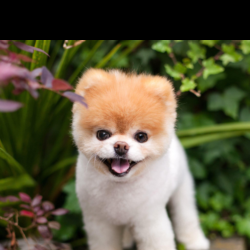

In [105]:
a=transforms.RandomAffine(0,translate=(0,0.8))
b=a(image)
b

Random Affine -
* scale (tuple, optional) – scaling factor interval, e.g (a, b), then scale is randomly sampled from the range a <= scale <= b. Will keep original scale by default.

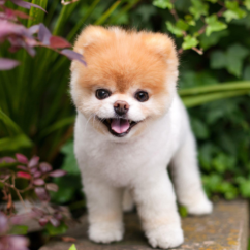

In [106]:
a=transforms.RandomAffine(0,scale=(.9, 1.1))
b=a(image)
b


* **shear (sequence or number, optional)** – 

  Range of degrees to select from. 
  
  If shear is a number, a shear parallel to the x axis in the range (-shear, +shear) will be applied. 
  
  Else if shear is a sequence of 2 values a shear parallel to the x axis in the range (shear[0], shear[1]) will be applied. 
  
  Else if shear is a sequence of 4 values, a x-axis shear in (shear[0], shear[1]) and y-axis shear in (shear[2], shear[3]) will be applied. 
  
  Will not apply shear by default.


In plane geometry, a shear mapping is a linear map that displaces each point in a fixed direction, by an amount proportional to its signed distance from the line that is parallel to that direction and goes through the origin. This type of mapping is also called shear transformation, transvection, or just shearing.



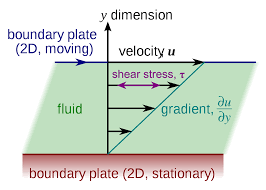

# **what does shear do?**


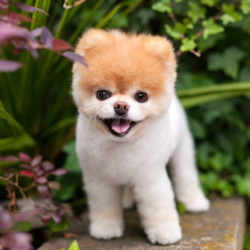

In [107]:
a=transforms.RandomAffine(degrees=0,shear=0.8)
b=a(image)
b

https://www.programcreek.com/python/example/117699/torchvision.transforms.RandomAffine

.Normalize()

.ToPILImage()

.Compose()

.ToTensor()

.Resize()

.CenterCrop()

.Scale()

.RandomHorizontalFlip()

.RandomCrop()

.Lambda()

.RandomSizedCrop()

.RandomRotation()

.RandomGrayscale()

.RandomVerticalFlip()

.RandomResizedCrop()

.ColorJitter()

.Pad()

.RandomAffine()

.Grayscale()

.TenCrop()

# 17. LAMBDA

In [108]:
a=transforms..Lambda()

b=a(image)
b

SyntaxError: ignored

# 18. Five Crop

In [111]:
(top_left, top_right, bottom_left, bottom_right, center) = T.FiveCrop(size=(100, 100))(image)
plot([top_left, top_right, bottom_left, bottom_right, center])

NameError: ignored

# **Functional Transform**

* Functional transforms give you fine-grained control of the transformation pipeline. 

* As opposed to the transformations above, functional transforms **don’t contain a random number generator for their parameters.** 

  That means you have to specify/generate all parameters, but the functional transform will give you reproducible results across calls.

Example: you can apply a functional transform with the same parameters to multiple images like this:


https://pytorch.org/vision/stable/transforms.html#functional-transforms

In Perspective Transformation, , we can change the perspective of a given image or video for getting better insights about the required information. In Perspective Transformation, we need provide the points on the image from which want to gather information by changing the perspective. We also need to provide the points inside which we want to display our image. Then, we get the perspective transform from the two given set of points and wrap it with the original image.

We use cv2.getPerspectiveTransform and then cv2.warpPerspective .

https://www.geeksforgeeks.org/perspective-transformation-python-opencv/

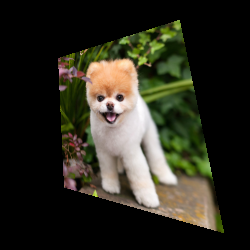

In [109]:
perspective_transformer = transforms.RandomPerspective(distortion_scale=0.6, p=1.0)
perspective_imgs = perspective_transformer(image) 
perspective_imgs

#a=transforms.RandomPerspective(distortion_scale=0.5, p=0.5, interpolation=<InterpolationMode.BILINEAR: 'bilinear'>, fill=0)
#b=a(image)
#b

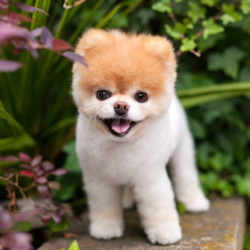

In [110]:
perspective_transformer = transforms.RandomPerspective(distortion_scale=0.6)
perspective_imgs = perspective_transformer(image) 
perspective_imgs
